In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust width to avoid line wrapping
pd.set_option('display.max_colwidth', None)  # Display full content in each cell

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# File path
file_path = "/content/drive/MyDrive/Research/Heart-Failure/Data/Filtered_Data.csv"
file_path_md = "/content/drive/MyDrive/Research/Heart-Failure/Data/dat_md.csv"
# Load CSV into DataFrame
filtered_data = pd.read_csv(file_path)
meds = pd.read_csv(file_path_md)

In [ ]:
filtered_data.head()

,Unnamed: 0,inpatient.number,DestinationDischarge,admission.ward,admission.way,discharge.department,visit.times,gender,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,diabetes,hemiplegia,leukemia,malignant.lymphoma,solid.tumor,AIDS,type.II.respiratory.failure,consciousness,eye.opening,verbal.response,movement,oxygen.inhalation,fio2,acute.renal.failure,outcome.during.hospitalization,death.within.28.days,re.admission.within.28.days,death.within.3.months,re.admission.within.3.months,death.within.6.months,re.admission.within.6.months,GCS,dischargeDay,ageCat,mean.corpuscular.volume,hemoglobin,mean.hemoglobin.volume,hematocrit,occupation,neutrophil.count,neutrophil.ratio,platelet,eosinophil.count,eosinophil.ratio,basophil.count,basophil.ratio,mean.hemoglobin.concentration,lymphocyte.count,red.blood.cell,monocyte.count,monocyte.ratio,white.blood.cell,uric.acid,urea,creatinine.enzymatic.method,carbon.dioxide.binding.capacity,chloride,potassium,calcium,sodium,CCI.score,moderate.to.severe.chronic.kidney.disease,peptic.ulcer.disease,liver.disease,return.to.emergency.department.within.6.months
0,1,857781,Home,Cardiology,NonEmergency,Cardiology,1,Male,36.7,87,19,102,64,76.666667,50.0,1.64,18.590125,Both,III,III,0,0,0,0,0,1,0,1,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,11,"(69,79]",94.5,131.0,32.0,0.387,UrbanResident,7.05,0.746,102.0,0.02,0.002,0.05,0.006,338.0,1.51,4.09,0.80,0.085,9.43,685.0,12.55,108.3,21.6,101.9,5.59,2.28,134.6,2.0,0.0,0.0,0.0,0.0
1,2,743087,Home,Cardiology,NonEmergency,Cardiology,1,Female,36.8,95,18,150,70,96.666667,51.0,1.63,19.195303,Both,III,I,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,8,"(69,79]",88.6,114.0,28.9,0.349,UrbanResident,3.73,0.702,123.0,0.05,0.009,0.01,0.002,326.0,1.18,3.93,0.35,0.066,5.32,170.0,4.29,62.0,26.5,105.6,3.62,2.28,144.0,0.0,0.0,0.0,0.0,0.0
2,3,866418,Home,Cardiology,NonEmergency,Cardiology,2,Male,36.5,98,18,102,67,78.666667,70.0,1.70,24.221453,Both,II,II,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,5,"(59,69]",96.4,144.0,32.6,0.427,farmer,11.54,0.887,169.0,0.02,0.002,0.03,0.002,339.0,0.75,4.43,0.67,0.051,13.01,567.0,15.99,185.1,21.6,107.0,4.15,2.56,142.2,0.0,0.0,0.0,0.0,0.0
3,4,775928,Home,Cardiology,Emergency,Cardiology,1,Male,36.0,73,19,110,74,86.000000,65.0,1.70,22.491349,Both,III,II,0,0,0,0,0,1,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,1,0,1,0,1,15,11,"(69,79]",102.2,94.0,34.7,0.277,UrbanResident,1.22,0.559,35.0,0.06,0.028,0.00,0.000,339.0,0.71,2.71,0.19,0.087,2.18,635.0,8.16,104.8,21.1,101.6,3.76,2.35,136.3,2.0,1.0,0.0,0.0,1.0
4,5,810128,Home,Cardiology,NonEmergency,Cardiology,1,Female,35.0,88,19,134,62,86.000000,76.0,1.55,31.633715,Both,III,II,0,0,0,0,0,0,0,0,0,0,0,0,0,NonTypeII,Clear,4,5,6,OxygenTherapy,33,0,Alive,0,0,0,0,0,0,15,5,"(69,79]",90.0,120.0,28.6,0.378,UrbanResident,4.28,0.697,104.0,0.05,0.008,0.01,0.002,317.0,1.27,4.20,0.53,0.086,6.14,432.0,6.86,83.9,22.8,104.3,3.94,2.42,136.6,0.0,0.0,0.0,0.0,0.0


In [ ]:
meds.head()

,Unnamed: 0,inpatient.number,Drug_name
0,1,857781,sulfotanshinone sodium injection
1,2,857781,Furosemide tablet
2,3,857781,Enoxaparin Sodium injection
3,4,857781,Meglumine Adenosine Cyclophosphate for injection
4,5,857781,Furosemide injection


# Descriptive Analysis

# 1. Distribution of Types of Heart Failure

**What We Are Doing:**

* Analyzing the prevalence of different types of heart failure among patients.
* Visualizing the distribution to identify the most common types.

**How It Helps:**
1. Clinical Focus: Identifies the most prevalent heart failure types, allowing for focused clinical research and specialized care programs.
2. Training and Education: Guides training efforts for healthcare professionals on the most common conditions.
3. Resource Planning: Assists in allocating resources to departments dealing with specific heart failure types.

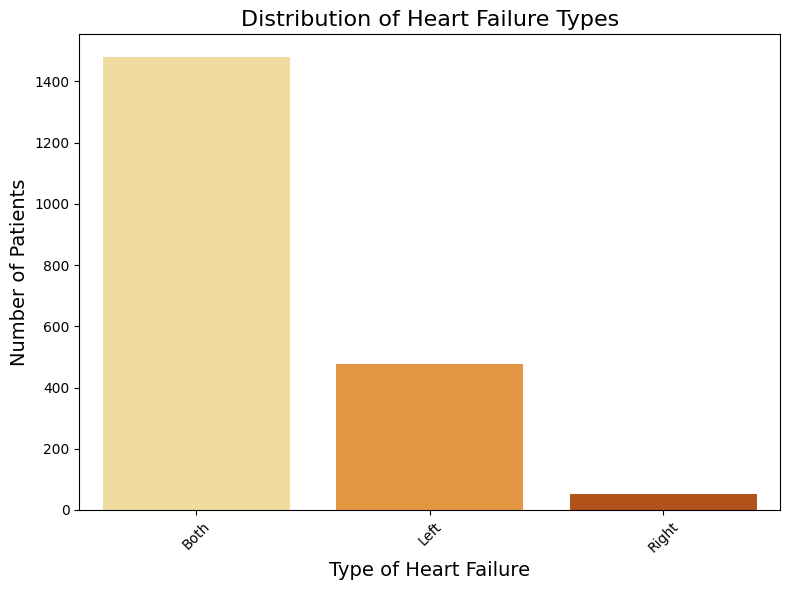

In [ ]:

# Heart Failure Type Counts
heart_failure_counts = filtered_data['type.of.heart.failure'].value_counts().reset_index()
heart_failure_counts.columns = ['Type of Heart Failure', 'Count']

# Plotting Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(
    data=heart_failure_counts,
    x='Type of Heart Failure',
    y='Count',
    palette='YlOrBr'
)
plt.title('Distribution of Heart Failure Types', fontsize=16)
plt.xlabel('Type of Heart Failure', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Gender Distribution and Length of Stay


**What We Are Doing**
* Analyzing the gender distribution in the patient population.

**How It Helps**
1. Resource Allocation: Understanding gender distribution aids in allocating resources appropriately.
2. Health Equity: Ensures that both male and female patients are receiving equitable care and attention.

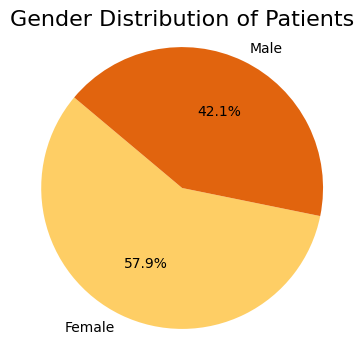

In [ ]:

# Gender Distribution
gender_counts = filtered_data['gender'].value_counts()

# Plotting Gender Distribution Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('YlOrBr', n_colors=2)
)
plt.title('Gender Distribution of Patients', fontsize=16)
plt.axis('equal')
plt.show()

# 3. Correlation Heatmap of Numerical Variables

**What We Are Doing**

* Analyzing Relationships: Computing the correlation coefficients between key numerical variables such as vital signs and laboratory values.
* Visualizing Correlations: Creating a heatmap to identify strong positive or negative relationships among these variables.

**How It Helps**
1. Variable Relationships: Reveals how different patient metrics are interrelated, aiding in understanding underlying health patterns.
2. Feature Selection: Assists in selecting important variables for predictive modeling and further statistical analyses.
3. Clinical Insights: Helps identify factors that may significantly impact patient care and outcomes, guiding clinical decisions.

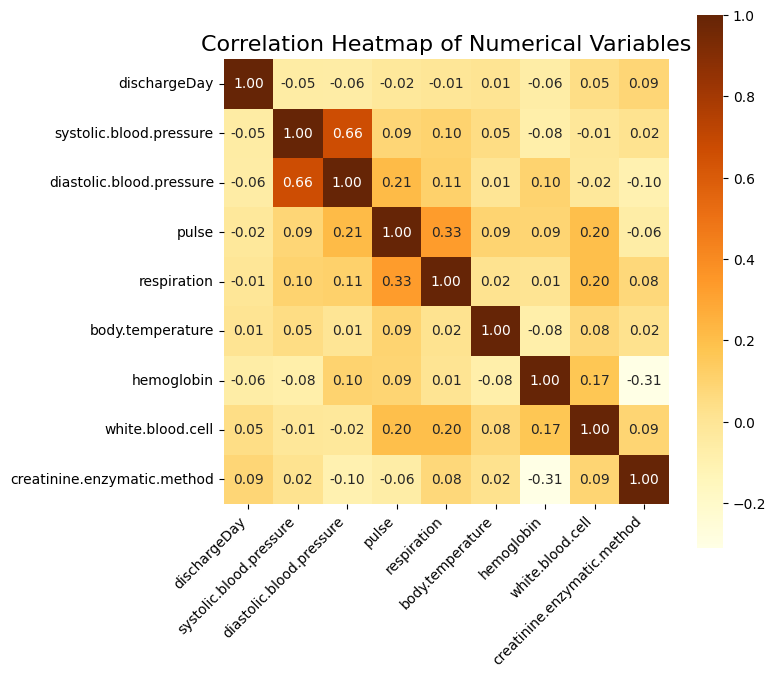

In [ ]:

# Select Numerical Variables
numerical_vars = [
    'dischargeDay',
    'systolic.blood.pressure',
    'diastolic.blood.pressure',
    'pulse',
    'respiration',
    'body.temperature',
    'hemoglobin',
    'white.blood.cell',
    'creatinine.enzymatic.method'
]

# Ensure selected columns are numeric
filtered_data_num = filtered_data[numerical_vars].apply(pd.to_numeric, errors='coerce')

# Compute Correlation Matrix
corr_matrix = filtered_data_num.corr()

# Plotting Heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='YlOrBr',
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Box Plots of Laboratory Values by Outcome

**What We Are Doing**
* Comparing laboratory values between patients who survived and those who did not within 28 days.
* Visualizing distributions using box plots to highlight differences.

**How It Helps**
1. Clinical Insights: Identifies lab markers that significantly differ between outcomes, potentially serving as prognostic indicators.
2. Targeted Interventions: Allows clinicians to monitor and manage critical lab values more closely in at-risk patients.
3. Improving Outcomes: Helps in developing strategies to correct abnormal lab values to improve patient survival rates.

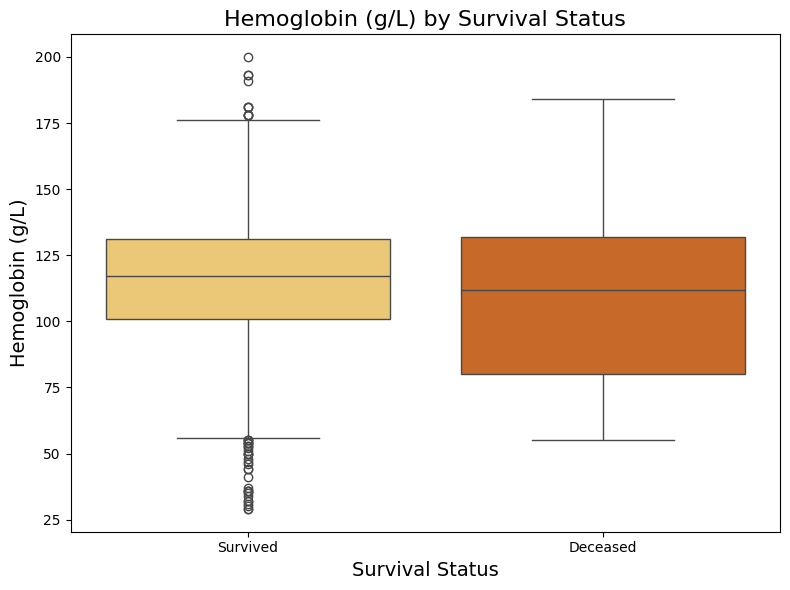

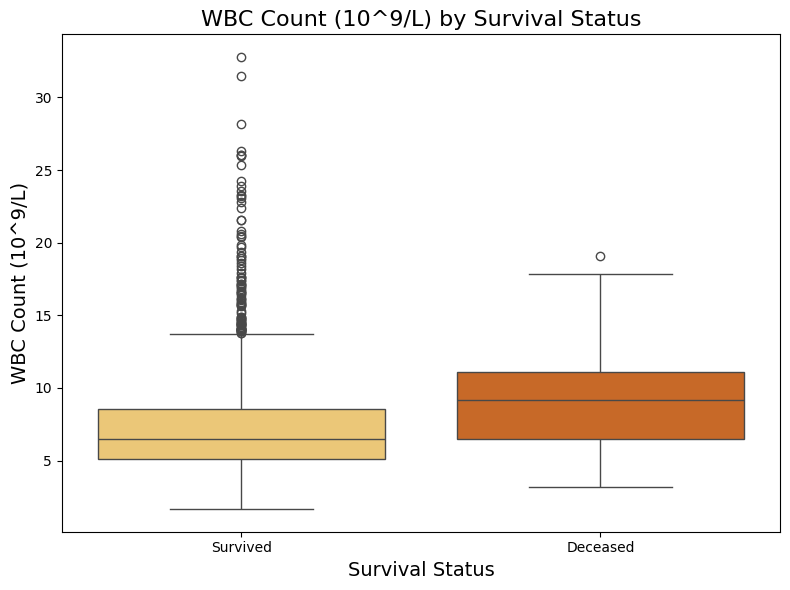

In [ ]:

# Ensure 'death.within.28.days' is categorical
filtered_data['Survival_Status'] = filtered_data['death.within.28.days'].map({0: 'Survived', 1: 'Deceased'})

# Select Lab Values to Analyze
lab_vars = ['hemoglobin', 'white.blood.cell']
lab_labels = ['Hemoglobin (g/L)', 'WBC Count (10^9/L)']

# Convert lab values to numeric
for var in lab_vars:
    filtered_data[var] = pd.to_numeric(filtered_data[var], errors='coerce')

# Plot Box Plots
for var, label in zip(lab_vars, lab_labels):
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        data=filtered_data,
        x='Survival_Status',
        y=var,
        palette='YlOrBr'
    )
    plt.title(f'{label} by Survival Status', fontsize=16)
    plt.xlabel('Survival Status', fontsize=14)
    plt.ylabel(label, fontsize=14)
    plt.tight_layout()
    plt.show()

# 5. Most Frequently Prescribed Medications


**What We Are Doing**
* Identifying the most commonly prescribed medications in the patient population.
* Visualizing the top medications to understand prescribing patterns.

**How It Helps**
1. Inventory Management: Helps the hospital pharmacy manage stock levels of the most commonly used medications.
2. Prescribing Practices: Provides insights into prescribing habits, which can inform training and guideline development.
3. Resource Allocation: Assists in budgeting and resource planning for medication procurement.

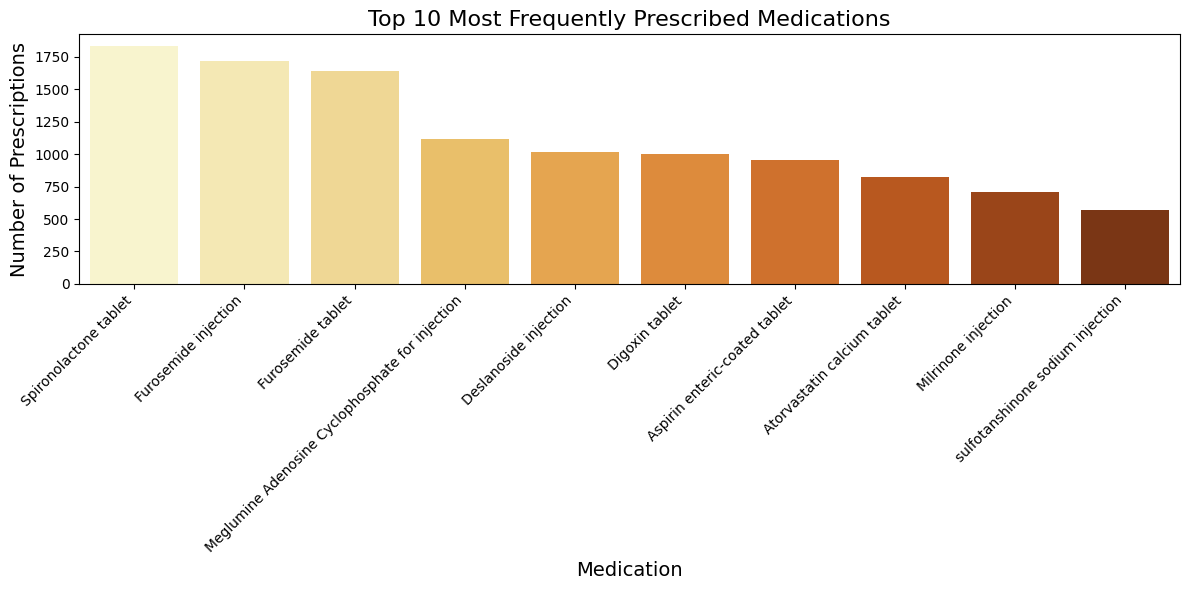

In [ ]:

# Count the frequency of each medication
medication_counts = meds['Drug_name'].value_counts().reset_index()
medication_counts.columns = ['Medication', 'Prescription_Count']

# Get the top 10 most prescribed medications
top_medications = medication_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_medications,
    x='Medication',
    y='Prescription_Count',
    palette='YlOrBr'
)
plt.title('Top 10 Most Frequently Prescribed Medications', fontsize=16)
plt.xlabel('Medication', fontsize=14)
plt.ylabel('Number of Prescriptions', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()